# US Flights 1988-2008
## by Duc Vu

### Table of Contents
<ul>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
</ul>

<a id="wrangling"></a>
## Preliminary Wrangling

The datasets are obtained through the [Statistical Computing
Statistical Graphics](http://stat-computing.org/dataexpo/2009/the-data.html) and contain US flights information for 1987-2008. 

Chosen for this project are flights information for five year intervals (1988, 1993, 1998, 2003, 2008). The files `Flights1988.csv` and other years contain the most important information about the flights, including scheduled and actual departure times, arrival times, cancellations, delays, etc.. From June 2003, there are additional information regarding the reasons for delays of flights. 

In addition to these files, the carrier airline, origin and destination locations information are located in seperate files - `carriers.csv` and `airport.csv` respectively. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

**Firstly**, the datasets containing the vital flight information `FlightsYYYY.csv` for different years are read into dataframes. 

In [2]:
# Loading Original Flight Information Dataset 1988-2008 (5-year interval)
f1988 = pd.read_csv("./Dataset/Flights1988.csv", encoding="utf-8")
f1993 = pd.read_csv("./Dataset/Flights1993.csv", encoding="utf-8")
f1998 = pd.read_csv("./Dataset/Flights1998.csv", encoding="utf-8")
f2003 = pd.read_csv("./Dataset/Flights2003.csv", encoding="utf-8")
f2008 = pd.read_csv("./Dataset/Flights2008.csv", encoding="utf-8")

/Users/ducvu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
f1988.shape, f1993.shape, f1998.shape, f2003.shape, f2008.shape

((5202096, 29), (5070501, 29), (5384721, 29), (6488540, 29), (7009728, 29))

In [5]:
# Column labels
f1988.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [8]:
# Check that all column names are the same for each dataset
#sum(f1988.columns == f1993.columns), sum(f1993.columns == f1998.columns), sum(f1998.columns == f2003.columns), sum(f2003.columns == f2008.columns)

As each dataframe contain large amounts of data, it is better to keep the dataframes seperate for faster running time rather than combining into one large dataframe. 

In [8]:
# Combine all flights dataset into one large DF
#flights_ls = [f1988, f1993, f1998, f2003, f2008]
#flights = pd.concat(flights_ls)

In [7]:
pd.set_option("display.max_column", 29)
f1988.sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1062333,1988,3,31,4,909.0,911,953.0,953,PI,708,NaN,44.0,42,NaN,0.0,-2.0,CLT,ROA,155.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1758748,1988,5,5,4,800.0,800,1615.0,1623,TW,840,NaN,315.0,323,NaN,-8.0,0.0,LAX,JFK,2475.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
512746,1988,2,5,5,1905.0,1815,2023.0,1940,UA,1074,NaN,78.0,85,NaN,43.0,50.0,SAN,SFO,447.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2866267,1988,7,27,3,1452.0,1452,1530.0,1540,DL,417,NaN,98.0,108,NaN,-10.0,0.0,SLC,SFO,599.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2642767,1988,7,24,7,1034.0,1035,1624.0,1616,UA,386,NaN,230.0,221,NaN,8.0,-1.0,DEN,MCO,1545.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [33]:
# Check the shape of combined dataset
#flights.shape

In [9]:
# Check the number of observations for each year
#flights.Year.value_counts()

**Secondly**, two seperate files containing carrier information (`carriers.csv`) and airport locations in the US (`airports.csv`) are added.

In [10]:
carriers = pd.read_csv("./Dataset/carriers.csv")
carriers.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [11]:
carriers.shape[0]

1491

In [12]:
airports = pd.read_csv("./Dataset/airports.csv")
airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


**Thirdly**, the carrier names from the `carriers` DF are combined with the all the flights DF. Before combining, create a copy of each DF. 

In [188]:
# Create a copy of each dataframe
f1988_clean = f1988.copy()
f1993_clean = f1993.copy()
f1998_clean = f1998.copy()
f2003_clean = f2003.copy()
f2008_clean = f2008.copy()

In [189]:
# Combining carriers to each DF
f1988_clean = pd.merge(f1988_clean, carriers, left_on = "UniqueCarrier", right_on = "Code", how = "left")
f1993_clean = pd.merge(f1993_clean, carriers, left_on = "UniqueCarrier", right_on = "Code", how = "left")
f1998_clean = pd.merge(f1998_clean, carriers, left_on = "UniqueCarrier", right_on = "Code", how = "left")
f2003_clean = pd.merge(f2003_clean, carriers, left_on = "UniqueCarrier", right_on = "Code", how = "left")
f2008_clean = pd.merge(f2008_clean, carriers, left_on = "UniqueCarrier", right_on = "Code", how = "left")

In [190]:
f1988_clean.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Code', 'Description'],
      dtype='object')

**Fourthly**, the airport city and states from the `airport` DF are merged with the flights DF for origin and destinations. Before merging, only the iata code, city and state are needed to be added. 

In [191]:
airports_mod = airports[["iata", "city", "state"]]
airports_mod.head()

,iata,city,state
0,00M,Bay Springs,MS
1,00R,Livingston,TX
2,00V,Colorado Springs,CO
3,01G,Perry,NY
4,01J,Hilliard,FL


In [192]:
# Combining origin locations
f1988_clean = pd.merge(f1988_clean, airports_mod, left_on = "Origin", right_on = "iata", how = "left")
f1993_clean = pd.merge(f1993_clean, airports_mod, left_on = "Origin", right_on = "iata", how = "left")
f1998_clean = pd.merge(f1998_clean, airports_mod, left_on = "Origin", right_on = "iata", how = "left")
f2003_clean = pd.merge(f2003_clean, airports_mod, left_on = "Origin", right_on = "iata", how = "left")
f2008_clean = pd.merge(f2008_clean, airports_mod, left_on = "Origin", right_on = "iata", how = "left")

In [193]:
# Combining destination locations
f1988_clean = pd.merge(f1988_clean, airports_mod, left_on = "Dest", right_on = "iata", how = "left")
f1993_clean = pd.merge(f1993_clean, airports_mod, left_on = "Dest", right_on = "iata", how = "left")
f1998_clean = pd.merge(f1998_clean, airports_mod, left_on = "Dest", right_on = "iata", how = "left")
f2003_clean = pd.merge(f2003_clean, airports_mod, left_on = "Dest", right_on = "iata", how = "left")
f2008_clean = pd.merge(f2008_clean, airports_mod, left_on = "Dest", right_on = "iata", how = "left")

In [194]:
f1988_clean.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Code', 'Description', 'iata_x', 'city_x', 'state_x', 'iata_y',
       'city_y', 'state_y'],
      dtype='object')

### Structure of the dataset

Each DataFrame contain all US flights for different years, with over five million flights each with 26 variables. Some variables require a change in datatypes. Others require a change in actual values.

In [195]:
f1988_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5202096 entries, 0 to 5202095
Data columns (total 37 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              float64
ActualElapsedTime    float64
CRSElapsedTime       int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     float64
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Code                 object
Description          object
iata_x       

The following variables (or columns) require a change in data types:
- `Cancelled` to a Boolean
- `Diverted` to a Boolean
- `DepTime`, `CRSDepTime`, `ArrTime`, `CRSArrTime` to an integer for regular expressions manipulation later 

In [196]:
f1988_clean.Cancelled.replace({1: True, 0: False}, inplace=True)
f1988_clean.Diverted.replace({1: True, 0: False}, inplace=True)

f1993_clean.Cancelled.replace({1: True, 0: False}, inplace=True)
f1993_clean.Diverted.replace({1: True, 0: False}, inplace=True)

f1998_clean.Cancelled.replace({1: True, 0: False}, inplace=True)
f1998_clean.Diverted.replace({1: True, 0: False}, inplace=True)

f2003_clean.Cancelled.replace({1: True, 0: False}, inplace=True)
f2003_clean.Diverted.replace({1: True, 0: False}, inplace=True)

f2008_clean.Cancelled.replace({1: True, 0: False}, inplace=True)
f2008_clean.Diverted.replace({1: True, 0: False}, inplace=True)

In [197]:
f1988_clean.Cancelled.value_counts()

False    5151933
True       50163
Name: Cancelled, dtype: int64

In [198]:
# Change datatypes to integer
time_ls = ["DepTime", "CRSDepTime", "ArrTime", "CRSArrTime"]

for time in time_ls:
    f1988_clean[time] = pd.Series(f1988_clean[time], dtype="Int64")
    f1993_clean[time] = pd.Series(f1993_clean[time], dtype="Int64")
    f1998_clean[time] = pd.Series(f1998_clean[time], dtype="Int64")
    f2003_clean[time] = pd.Series(f2003_clean[time], dtype="Int64")
    f2008_clean[time] = pd.Series(f2008_clean[time], dtype="Int64")

In addition, the values in the `CancellationCode` will be replaced with the actual reason instead of a code. Prior to 2003, the reasons were not recorded. Therefore, only the flights in 2008 will be affected by this analysis.

In [211]:
f2008_clean.CancellationCode = f2008_clean.CancellationCode.astype(object)
f2008_clean.CancellationCode.value_counts()

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

In [212]:
cancellation_dict = {"A": "carrier", "B": "weather", "C": "NAS", "D": "security"}
f2008_clean.CancellationCode = f2008_clean.CancellationCode.replace(cancellation_dict)
f2008_clean.CancellationCode.value_counts()

weather     54904
carrier     54330
NAS         28188
security       12
Name: CancellationCode, dtype: int64

Furthermore, US Airways Inc. and America West Airlines Inc. merged to form US Airways Inc. from September 2005. Thus, prior to 2005, the names of the two airlines will be as they are, and after 2005, only US Airways Inc. exist. 

In [310]:
f1988_clean.Airline.value_counts()

Delta Air Lines Inc.                                                                   753983
American Airlines Inc.                                                                 694757
United Air Lines Inc.                                                                  587144
US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)    494383
Piedmont Aviation Inc.                                                                 470957
Continental Air Lines Inc.                                                             457031
Northwest Airlines Inc.                                                                431440
Eastern Air Lines Inc.                                                                 389292
Trans World Airways LLC                                                                275819
Southwest Airlines Co.                                                                 262422
America West Airlines Inc. (Merged with US Airways 9/05. Sto

In [311]:
# Prior to 2005, the two airlines will be under their own names (removing the "(Merged...)")
airline_dict = {"US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)": "US Airways Inc.",
               "America West Airlines Inc. (Merged with US Airways 9/05. Stopped reporting 10/07.)": "America West Airlines Inc."}

f1988_clean.Airline = f1988_clean.Airline.replace(airline_dict)
f1993_clean.Airline = f1993_clean.Airline.replace(airline_dict)
f1998_clean.Airline = f1998_clean.Airline.replace(airline_dict)
f2003_clean.Airline = f2003_clean.Airline.replace(airline_dict)

In [315]:
# After 2005, both airlines merged and only formed "US Airways Inc."
f2008_clean.Airline = f2008_clean.Airline.replace(airline_dict)
f2008_clean.Airline.value_counts()

Southwest Airlines Co.          1201754
American Airlines Inc.           604885
Skywest Airlines Inc.            567159
American Eagle Airlines Inc.     490693
US Airways Inc.                  453589
Delta Air Lines Inc.             451931
United Air Lines Inc.            449515
Expressjet Airlines Inc.         374510
Northwest Airlines Inc.          347652
Continental Air Lines Inc.       298455
Atlantic Southeast Airlines      280575
Pinnacle Airlines Inc.           262208
AirTran Airways Corporation      261684
Mesa Airlines Inc.               254930
Comair Inc.                      197607
JetBlue Airways                  196091
Alaska Airlines Inc.             151102
Frontier Airlines Inc.            95762
Hawaiian Airlines Inc.            61826
Aloha Airlines Inc.                7800
Name: Airline, dtype: int64

The `DepTime`, `CRSDepTime`, `ArrTime` and `CRSArrTime` requires padding as the timings are either three or four digits long. For consistency, the timings before 1000 will be padded with a zero in front. For example 737 will become 0737.

In [586]:
# First, padding of 0 is required for timings with 3 digit widths, i.e. timings before 1000. 
# Method below requires the timings to be changed to object type
f1988_clean.CRSDepTime = f2008_clean.CRSDepTime.astype(str).str.zfill(4)
f1993_clean.CRSDepTime = f2008_clean.CRSDepTime.astype(str).str.zfill(4)
f1998_clean.CRSDepTime = f2008_clean.CRSDepTime.astype(str).str.zfill(4)
f2003_clean.CRSDepTime = f2008_clean.CRSDepTime.astype(str).str.zfill(4)
f2008_clean.CRSDepTime = f2008_clean.CRSDepTime.astype(str).str.zfill(4)
f2008_clean.CRSDepTime[0:5]

0    1955
1    0735
2    0620
3    0930
4    1755
Name: CRSDepTime, dtype: object

In [213]:
f1988_clean.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,5202096.0,5.202096e+06,5.202096e+06,5.202096e+06,5.151933e+06,5.202096e+06,5.137497e+06,5.202096e+06,5.202096e+06,0.0,5.137497e+06,5.202096e+06,0.0,5.137497e+06,5.151933e+06,5.190994e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1988.0,6.508971e+00,1.575754e+01,3.954361e+00,1.363779e+03,1.357067e+03,1.493592e+03,1.493383e+03,6.870138e+02,NaN,1.040407e+02,1.039866e+02,NaN,6.547350e+00,6.706768e+00,6.015666e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,3.445201e+00,8.798635e+00,1.987931e+00,4.755135e+02,4.697043e+02,4.937432e+02,4.837890e+02,5.186402e+02,NaN,6.196058e+01,6.173844e+01,NaN,2.332517e+01,2.177714e+01,5.011000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1988.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,-5.300000e+02,-5.200000e+01,NaN,-1.185000e+03,-1.000000e+03,1.000000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1988.0,4.000000e+00,8.000000e+00,2.000000e+00,9.440000e+02,9.400000e+02,1.118000e+03,1.117000e+03,2.960000e+02,NaN,6.100000e+01,6.100000e+01,NaN,-5.000000e+00,0.000000e+00,2.560000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1988.0,7.000000e+00,1.600000e+01,4.000000e+00,1.340000e+03,1.335000e+03,1.520000e+03,1.519000e+03,5.780000e+02,NaN,8.500000e+01,8.500000e+01,NaN,2.000000e+00,0.000000e+00,4.320000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1988.0,1.000000e+01,2.300000e+01,6.000000e+00,1.748000e+03,1.740000e+03,1.916000e+03,1.911000e+03,9.380000e+02,NaN,1.320000e+02,1.320000e+02,NaN,1.100000e+01,5.000000e+00,8.130000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1988.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,6.189000e+03,NaN,1.737000e+03,1.560000e+03,NaN,1.394000e+03,1.439000e+03,4.983000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Main features of interest in the dataset



### The following features in the dataset will help support the questions of interest as outlined above.  

The main features (or columns) of interest are:
- `Year`
- `Month`
- `DayOfWeek`
- `DepTime` - actual depature time (local, in hhmm)
- `CRSDepTime` - scheduled departure time (local, in hhmm)
- `ArrTime` - actual arrival time (in hhmm)
- `CRSArrTime` - scheduled arrival time (local, in hhmm)
- `ActualElapsedTime` - in minutes
- `CRSElapsedTime` - in minutes
- `AirTime` - time of flight (in minutes)
- `ArrDelay` - arrival delay (in minutes)
- `DepDelay` - departure delay (in minutes)
- `Distance` - in miles
- `Cancelled` - was the flight cancelled? 
- `CancellationReason` - reason for cancellation. This column is renamed from `CancellationCode` and the appropriate reason is shown. 
- `Diverted` - was the flight diverted? 
- `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay` - in minutes
-  `Airline` - name of airline carrier, renamed from `Description` column
- `Origin_city` and `Origin_state` - location of origin of flight, renamed from `city_x` and `state_x` 
- `Dest_city` and `Dest_state` - location of origin of flight, renamed from `city_y` and `state_y`

In [214]:
# Rename columns
f1988_clean.rename(columns={"city_x": "Origin_city", "state_x": "Origin_state", "city_y": "Dest_city", 
                            "state_y": "Dest_state", "Description": "Airline", 
                            "CancellationCode": "CancellationReason"}, inplace = True)
f1993_clean.rename(columns={"city_x": "Origin_city", "state_x": "Origin_state", "city_y": "Dest_city", 
                            "state_y": "Dest_state", "Description": "Airline", 
                            "CancellationCode": "CancellationReason"}, inplace = True)
f1998_clean.rename(columns={"city_x": "Origin_city", "state_x": "Origin_state", "city_y": "Dest_city", 
                            "state_y": "Dest_state", "Description": "Airline", 
                            "CancellationCode": "CancellationReason"}, inplace = True)
f2003_clean.rename(columns={"city_x": "Origin_city", "state_x": "Origin_state", "city_y": "Dest_city", 
                            "state_y": "Dest_state", "Description": "Airline", 
                            "CancellationCode": "CancellationReason"}, inplace = True)
f2008_clean.rename(columns={"city_x": "Origin_city", "state_x": "Origin_state", "city_y": "Dest_city", 
                            "state_y": "Dest_state", "Description": "Airline", 
                            "CancellationCode": "CancellationReason"}, inplace = True)

In [221]:
# Dropped unnecessary columns
columns_drop = ['DayofMonth', 'UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest', 
                'TaxiIn', 'TaxiOut', 'Code', 'iata_x', 'iata_y']

f1988_clean.drop(columns_drop, axis = 1, inplace = True)
f1993_clean.drop(columns_drop, axis = 1, inplace = True)
f1998_clean.drop(columns_drop, axis = 1, inplace = True)
f2003_clean.drop(columns_drop, axis = 1, inplace = True)
f2008_clean.drop(columns_drop, axis = 1, inplace = True)

In [222]:
f1988_clean.columns

Index(['Year', 'Month', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Distance', 'Cancelled', 'CancellationReason',
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'Airline', 'Origin_city', 'Origin_state',
       'Dest_city', 'Dest_state'],
      dtype='object')

In [223]:
f1988_clean.shape

(5202096, 26)

In [224]:
f1988_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5202096 entries, 0 to 5202095
Data columns (total 26 columns):
Year                  int64
Month                 int64
DayOfWeek             int64
DepTime               Int64
CRSDepTime            Int64
ArrTime               Int64
CRSArrTime            Int64
ActualElapsedTime     float64
CRSElapsedTime        int64
AirTime               float64
ArrDelay              float64
DepDelay              float64
Distance              float64
Cancelled             bool
CancellationReason    float64
Diverted              bool
CarrierDelay          float64
WeatherDelay          float64
NASDelay              float64
SecurityDelay         float64
LateAircraftDelay     float64
Airline               object
Origin_city           object
Origin_state          object
Dest_city             object
Dest_state            object
dtypes: Int64(4), bool(2), float64(11), int64(4), object(5)
memory usage: 1022.0+ MB


<a id="uni"></a>
## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In this section of univariate exploration, the year **2008** will be explored. The distribution of flights from the following variables are explored individually. 

1. `Month` - are flights more common in a particular month compared to another?
2. `DayOfWeek` - are there more or fewer flights scheduled in a particular day of the week?
3. `DepDelay` (calculated from `DepTime` and `CRSDepTime`) - what is the distribution of the difference between actual and scheduled depature time?
4. `ArrDelay` (calculated from `ArrTime` and `CRSArrTime`) - what is the distribution of the difference between actual and scheduled arrival time?
5. `CRSDepTime` - are there more flights scheduled at a particular hour of the day?
6. `AirTime` - what is the distribution of the duration of flights?
7. `Distance` - what is the distribution of distances travelled by aircrafts?
8. `Cancelled`  and  `CancellationReason` - what is the proportion of flights cancelled? What are the reasons for cancellations?
9. `Diverted` - what is the proportion of flights diverted?
10. `Airline` - which airline has the most and least flights scheduled?
11. `Origin_city` - what are the top 10 cities with the most flights scheduled to take off?
12. `Origin_state` - what are the top 3 states with the most flights scheduled to take off? What are the top 3 states with the least flights scheduled to take off?

#### `Month`

**Are flights more common in a particular month compared to another?**

In [225]:
month2008 = f2008_clean.Month.value_counts()
month2008

7     627931
3     616090
8     612279
6     608665
5     606293
1     605765
4     598126
2     569236
10    556205
12    544958
9     540908
11    523272
Name: Month, dtype: int64

array([100000, 200000, 300000, 400000, 500000, 600000])

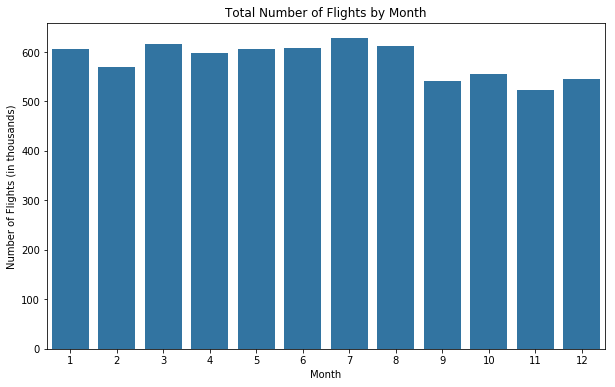

In [838]:
plt.figure(figsize = (10, 6))

# Set standard seaborn color of bar charts to single colour
base_color = sb.color_palette()[0]

# Plot qualitative variable by Month
sb.countplot(data = f2008_clean, x = "Month", color = base_color)
plt.title("Total Number of Flights by Month")
plt.ylabel("Number of Flights (in thousands)")

# Change tick labels for readability 
ticks1 = np.array([n for n in range(0, 601, 100)])
plt.yticks(ticks1 * 1000, ticks1);

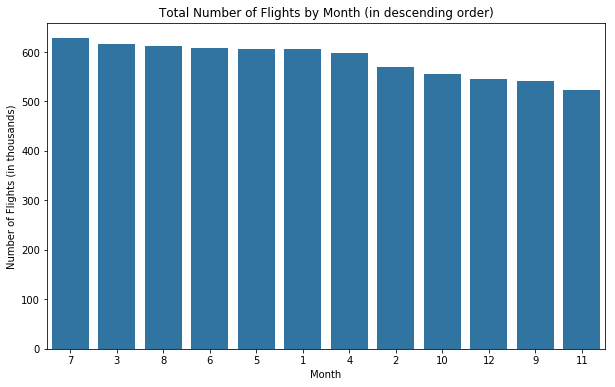

In [839]:
# Plot qualitative variable in descending order of flights
plt.figure(figsize = (10, 6))
sb.countplot(data = f2008_clean, x = "Month", color = base_color, order = month2008.index)

plt.title("Total Number of Flights by Month (in descending order)")
plt.ylabel("Number of Flights (in thousands)")
plt.yticks(ticks1 * 1000, ticks1);

In [228]:
(f2008_clean.Month.value_counts().values[0] - f2008_clean.Month.value_counts().values[-1])/f2008_clean.Month.value_counts().values[0] 

0.1666727713713768

In 2008, the month with the most flights and least flights scheduled is July and November, respectively. The difference is almost by 100,000 flights or around 17% lower.

#### `DayOfWeek`

**Are there more or fewer flights scheduled in a particular day of the week?**

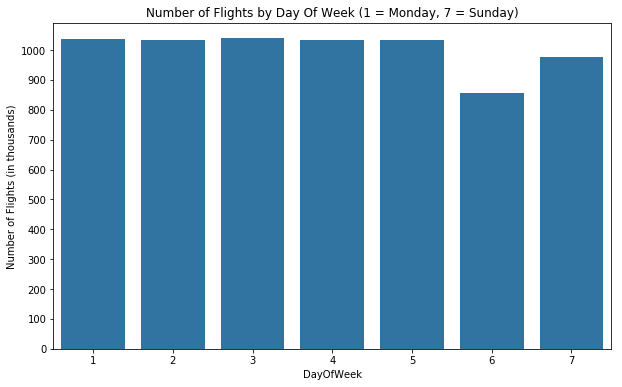

In [837]:
plt.figure(figsize = (10, 6))
sb.countplot(f2008_clean.DayOfWeek, color = base_color)

plt.title("Number of Flights by Day Of Week (1 = Monday, 7 = Sunday)")
plt.ylabel("Number of Flights (in thousands)")
ticks2 = np.array([n for n in range(0, 1001, 100)])
plt.yticks(ticks2 * 1000, ticks2);

This gives an unexpected and interesting distribution. During the weekdays (Mondays to Fridays), the number of flights scheduled are very similar. On the weekends (Saturdays and Sundays), the number of flights are visibly lower, with Saturdays experiencing a significant dip. 

#### `DepDelay`
    
**What is the distribution of the difference between actual and scheduled depature time?**

In [591]:
# First remove the flights that have NaN values
departure_delay = f2008_clean[f2008_clean.DepDelay.notnull()]

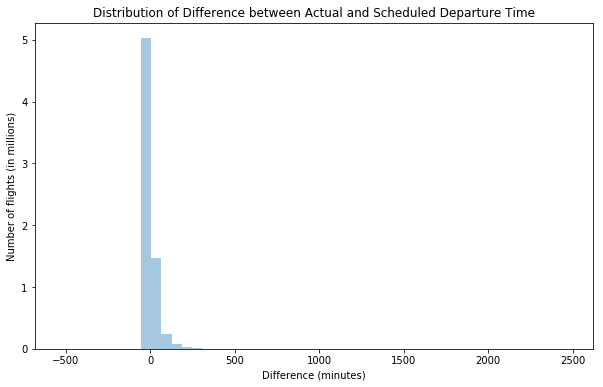

In [836]:
plt.figure(figsize = (10, 6))
sb.distplot(departure_delay.DepDelay, kde = False)

plt.title("Distribution of Difference between Actual and Scheduled Departure Time")
plt.xlabel("Difference (minutes)")
plt.ylabel("Number of flights (in millions)")

ticks3 = np.array([n for n in range(0, 6)])
plt.yticks(ticks3*1e6, ticks3);

In [596]:
departure_delay.DepDelay.min(), departure_delay.DepDelay.max()

(-534.0, 2467.0)

In [600]:
departure_delay[departure_delay.DepDelay < -90.0]

,Year,Month,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,CancellationReason,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airline,Origin_city,Origin_state,Dest_city,Dest_state
146340,2008,1,5,743,0915,1051,1105,188.0,110.0,77.0,-14.0,-92.0,533,False,NaN,False,NaN,NaN,NaN,NaN,NaN,Mesa Airlines Inc.,Atlanta,GA,Chantilly,VA
5179806,2008,9,1,136,1030,456,1335,380.0,365.0,355.0,-519.0,-534.0,2762,False,NaN,False,NaN,NaN,NaN,NaN,NaN,Hawaiian Airlines Inc.,Las Vegas,NV,Honolulu,HI


As shown above, there appears to be huge outliers for flights leaving earlier than 90 minutes than the scheduled departure time, and flights that leave over 120 minutes later than scheduled. 

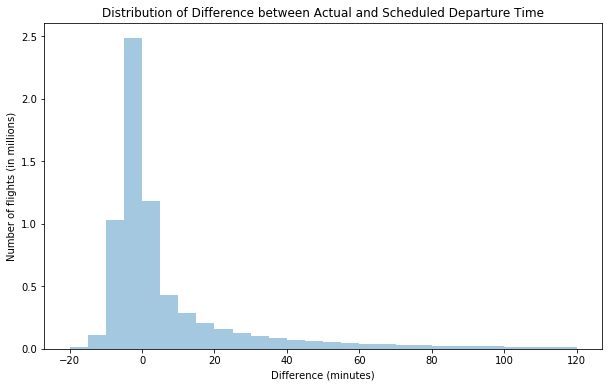

In [834]:
bin_edges = [i for i in range(-20, 121, 5)]
plt.figure(figsize = (10, 6))
sb.distplot(departure_delay.DepDelay, bins = bin_edges, kde = False)

plt.title("Distribution of Difference between Actual and Scheduled Departure Time")
plt.xlabel("Difference (minutes)")
plt.ylabel("Number of flights (in millions)")

ticks4 = np.array([n/2 for n in range(0, 6)])
plt.yticks(ticks4*1e6, ticks4);

Looking at the distribution, it follows a postive (right skew), wth the majority of fligths leaving around the time of scheduled depature time. As the difference in the actual and scheduled depatrue time increases, the number of flights that fall into these bins decreases.

#### `ArrDelay` 

**What is the distribution of the difference between actual and scheduled arrival time?**

In [607]:
# First remove the flights that have NaN values
arrival_delay = f2008_clean[f2008_clean.ArrDelay.notnull()]

Below, outliers will already be taken into consideration and removed to view the distribtion, similar to `DepDelay`. 

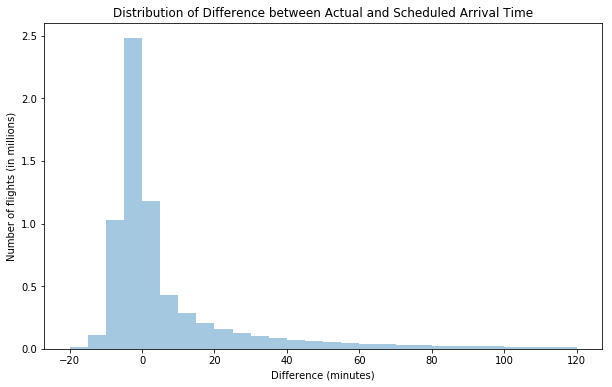

In [835]:
plt.figure(figsize = (10, 6))
sb.distplot(arrival_delay.DepDelay, bins = bin_edges, kde = False)

plt.title("Distribution of Difference between Actual and Scheduled Arrival Time")
plt.xlabel("Difference (minutes)")
plt.ylabel("Number of flights (in millions)")
plt.yticks(ticks4*1e6, ticks4);

As expected, the distribution follows very similarly to the previous section on `DepDelay`. 

#### `CRSDepTime` 

**Are there more flights scheduled at a particular hour of the day?**

In [479]:
f2008_clean.CRSDepTime[0:5]

0    1955
1    0735
2    0620
3    0930
4    1755
Name: CRSDepTime, dtype: object

In [488]:
# Extract just the hours
hour = f2008_clean.CRSDepTime.astype(str).str[:2]
hour.value_counts()

06    504061
07    481275
08    481092
13    463748
11    461657
09    458725
17    457092
16    455096
10    447779
12    437126
14    432680
15    420026
18    416250
19    395470
20    271335
21    246521
22     85488
05     48436
23     31867
00      8877
01      2836
04       933
02       818
03       540
Name: CRSDepTime, dtype: int64

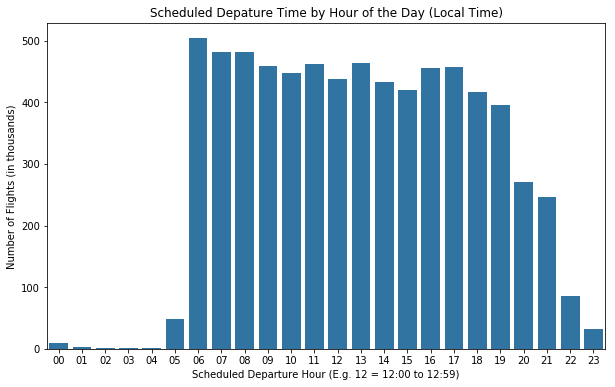

In [833]:
plt.figure(figsize = (10, 6))
sb.countplot(hour, color = base_color)

plt.title("Scheduled Depature Time by Hour of the Day (Local Time)")
plt.xlabel("Scheduled Departure Hour (E.g. 12 = 12:00 to 12:59)")
plt.ylabel("Number of Flights (in thousands)")
ticks5 = np.array([n for n in range(0, 600, 100)])
plt.yticks(ticks5*1000, ticks5);

This plot shows an interesting insight. Very few flights are scheduled between 23:00 and 5:59, with the fewest between 01:00 and 04:59. Starting from 6:00 to 19:59, the number of flights scheduled are very high and fairly similar in numbers. Then from 20:00 the number of flights start to drop off sequentially until 2:59. Could this drop in number of flights be due to the poor visibility at night compared with during the day? Or could this be due to lack of demand of passengers for flights late at night and very early morning?

#### `AirTime` 

**What is the distribution of the duration of flights?**

Before continuing, we find that some flights have NaN values of AirTime. They are associated with cancelled or diverted flights and will be ignored in this analysis.

In [231]:
# DF continuing all flights with a valid AirTime
airtime2008 = f2008_clean[f2008_clean.AirTime.notnull()]

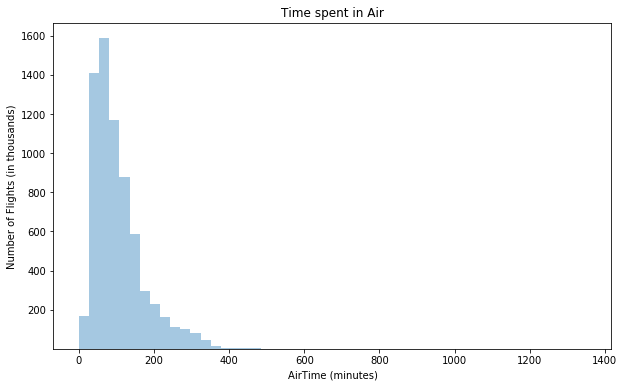

In [797]:
# AirTime is a quantitative variable, so a histogram is appropriate
plt.figure(figsize = (10, 6))
sb.distplot(airtime2008.AirTime, kde = False)

plt.title("Time spent in Air")
plt.xlabel("AirTime (minutes)")
plt.ylabel("Number of Flights (in thousands)")
ticks6 = np.array([n for n in range(200, 1700, 200)])
plt.yticks(ticks6*1000, ticks6);

From the initial plot, there appears to be quite a few outliers in `AirTime`. After closer inspection, the outliers are mainly due to flights to and from Honolulu, Hawaii, which is located in the middle of the Pacific Ocean and far away from mainland USA.

In [236]:
f2008_clean[f2008_clean.AirTime > 400].Origin_city.value_counts()

Honolulu             3400
Dallas-Fort Worth    1096
Chicago               873
Houston               848
Atlanta               741
Denver                490
Newark                398
Minneapolis           365
Kahului               273
Kailua/Kona           221
Boston                129
San Juan              124
New York               84
Covington              65
Anchorage              44
Phoenix                31
Salt Lake City         16
Miami                  16
Los Angeles            15
Philadelphia            8
Las Vegas               7
Seattle                 6
Lihue                   3
Detroit                 2
Sacramento              2
Orlando                 2
Islip                   1
San Jose                1
San Diego               1
Name: Origin_city, dtype: int64

When `AirTime` is plotted without outliers (above 400 minutes), the following histogram is obtained. 

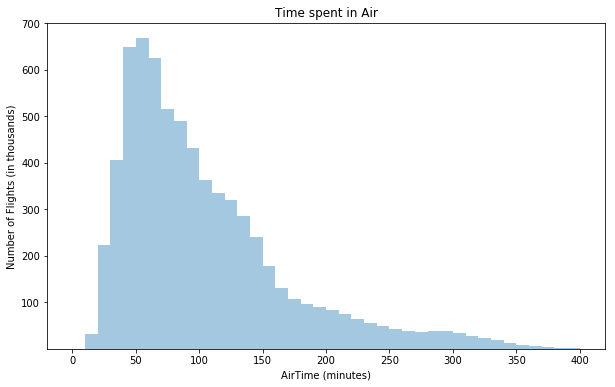

In [800]:
# Plot without outliers. 
bin_edges = [num for num in range(0, 401, 10)]
plt.figure(figsize = (10, 6))

sb.distplot(airtime2008.AirTime, kde = False, bins = bin_edges)
plt.title("Time spent in Air")
plt.xlabel("AirTime (minutes)")
plt.ylabel("Number of Flights (in thousands)")
ticks7 = np.array([n for n in range(100, 800, 100)])
plt.yticks(ticks7*1000, ticks7);

The histogram shows that `AirTime` follows a positive (right) skew distribution, with peaks at around 50-70 minutes. This indicates that flights within the US tend to be short, with majority of flights taking less than 2.5 hours. 

#### `Distance`

**What is the distribution of distances travelled by aircrafts?**

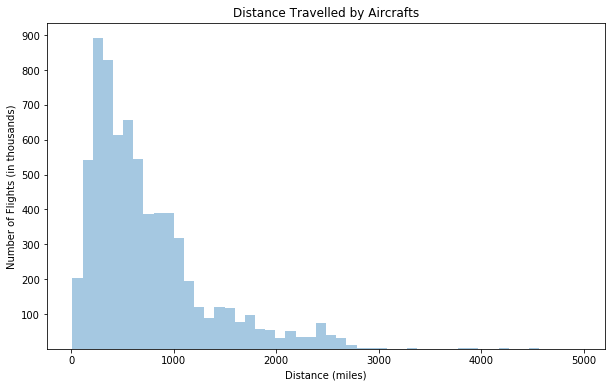

In [801]:
# Distance is a quantitative variable, so a histogram is appropriate
plt.figure(figsize = (10, 6))
sb.distplot(f2008_clean.Distance, kde = False)

plt.title("Distance Travelled by Aircrafts")
plt.xlabel("Distance (miles)")
plt.ylabel("Number of Flights (in thousands)")
ticks8 = np.array([n for n in range(100, 1000, 100)])
plt.yticks(ticks8*1000, ticks8);

In [240]:
f2008_clean[f2008_clean.Distance > 3000].Origin_city.value_counts()

Honolulu             3806
Dallas-Fort Worth    1251
Houston               908
Chicago               862
Atlanta               752
Denver                620
Anchorage             565
Kahului               529
Minneapolis           366
Newark                362
Kailua/Kona           266
San Juan              144
Los Angeles           144
Covington              90
Lihue                  45
Name: Origin_city, dtype: int64

As expected, there are also outliers of distance travelled, mainly associated with flights from and to Honolulu, Hawaii. 

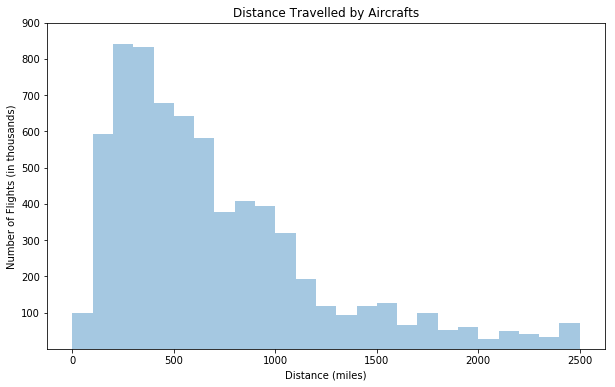

In [802]:
bin_edges2 = [num for num in range(0, 2501, 100)]
plt.figure(figsize = (10, 6))

sb.distplot(f2008_clean.Distance, kde = False, bins = bin_edges2)
plt.title("Distance Travelled by Aircrafts")
plt.xlabel("Distance (miles)")
plt.ylabel("Number of Flights (in thousands)")
plt.yticks(ticks8*1000, ticks8);

As shown below, `Distance` travelled also follows a postive (right) skew similar to `AirTime`. This is what we predict, as we would expect both `Distance` and `AirTime` are closely correlated. 

#### `Cancelled`  and  `Cancellation Reasons` 

**What is the proportion of flights cancelled?**

In [343]:
sorted_cancelled = f2008_clean.Cancelled.value_counts()
prop_cancelled = sorted_cancelled.values[1]/sum(sorted_cancelled.values)*100
prop_completed = 100 - prop_cancelled

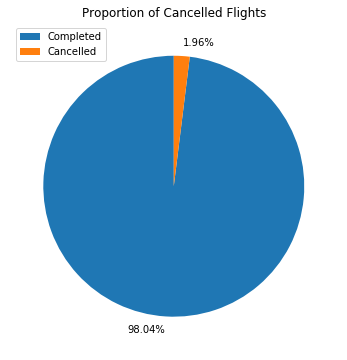

In [357]:
# Plotting pie chart showing the proportion of flights cancelled
plt.figure(figsize = [6, 6])
plt.pie(sorted_cancelled, startangle = 90,  
        labels = ['{:.2f}%'.format(prop_completed), '{:.2f}%'.format(prop_cancelled)])

plt.title("Proportion of Cancelled Flights")
plt.legend(labels = ["Completed", "Cancelled"], loc = 2);

Around 1.96% of flights are cancelled, or roughly one in fifty flights. 

**What are the reasons for cancellations?**

The following definitions for reasons for cancellations of flights are based from [this website](https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations). 

- **Carrier**: The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
- **Weather**: Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.
- **National Aviation System (NAS)**: Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
- **Security**: Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

For delays analysis later on, the following definition may be useful.
- **Late-arriving aircraft**: A previous flight with same aircraft arrived late, causing the present flight to depart late.

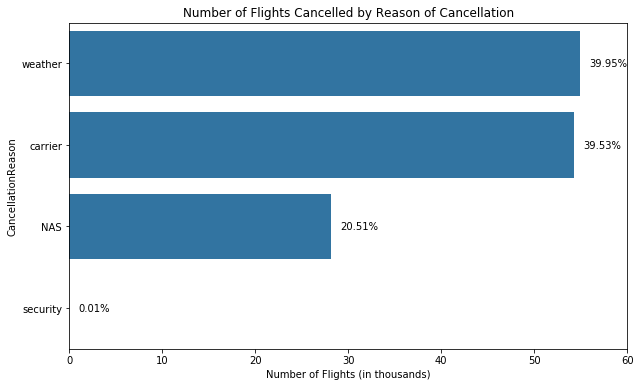

In [832]:
cancellation_reason = f2008_clean.CancellationReason.value_counts()

plt.figure(figsize = (10, 6))
sb.countplot(data = f2008_clean, y = "CancellationReason", order = cancellation_reason.index,
            color = base_color)
plt.title("Number of Flights Cancelled by Reason of Cancellation")
plt.xlabel("Number of Flights (in thousands)")
ticks14 = np.array([n for n in range(0, 70, 10)])
plt.xticks(ticks14*1000, ticks14)


for i in range(cancellation_reason.shape[0]):
    count = cancellation_reason[i]
    percentage = '{:0.2f}%'.format(count/sum(cancellation_reason) * 100)
    plt.text(count + 1000, i, percentage, va = "center");

Up to 80% of cancellation of flights are split roughly evenly between the weather and the airline carrier. There are very few cancellations due to security reasons. 

#### `Diverted` 

**What is the proportion of flights diverted?**

In [360]:
sorted_diverted = f2008_clean.Diverted.value_counts()
diverted_prop = f2008_clean.Diverted.value_counts()[1]/sum(f2008_clean.Diverted.value_counts())*100
notdiverted_prop = 100 - diverted_prop

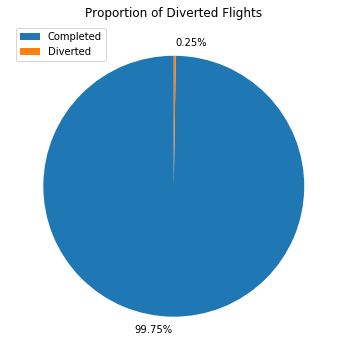

In [363]:
plt.figure(figsize = [6, 6])
plt.pie(sorted_diverted, startangle = 90, 
        labels = ['{0:.2f}%'.format(notdiverted_prop), '{0:.2f}%'.format(diverted_prop)])

plt.title("Proportion of Diverted Flights")
plt.legend(labels = ["Completed", "Diverted"], loc = 2);

Compared with cancelled flights, the proportion of diverted flights is even lower at 0.25%. 

#### `Airline` 

Which airline has the most and least flights scheduled?

In [808]:
airline_counts = f2008_clean.Airline.value_counts()
airline_counts[0:5]

Southwest Airlines Co.          1201754
American Airlines Inc.           604885
Skywest Airlines Inc.            567159
American Eagle Airlines Inc.     490693
US Airways Inc.                  453589
Name: Airline, dtype: int64

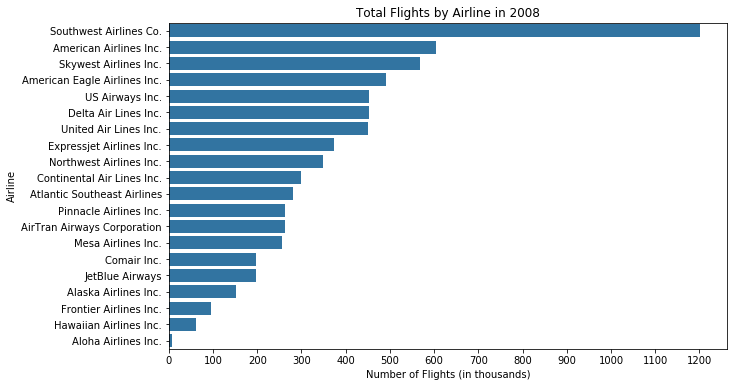

In [831]:
plt.figure(figsize = (10, 6))
sb.countplot(data = f2008_clean, y = "Airline", 
             order = airline_counts.index, color = base_color)

plt.title("Total Flights by Airline in 2008")
plt.xlabel("Number of Flights (in thousands)")
ticks9 = np.array([n for n in range(0, 1300, 100)])
plt.xticks(ticks9*1000, ticks9);

Southwest Airlines Co. is by far the airline with the most flights scheduled, almost double the second highest (American Airlines Inc.). On the other extreme, Aloha Airlines Inc. has scheduled by far the least number of flights.

#### `Origin_city` 

**What are the top 10 cities with the most flights scheduled to take off?**

In [401]:
top10_cities = f2008_clean.Origin_city.value_counts()[0:10]
top10_cities

Chicago              437999
Atlanta              414513
Dallas-Fort Worth    281281
Denver               241443
Houston              241105
New York             237939
Los Angeles          215608
Phoenix              199408
Las Vegas            172876
Detroit              161989
Name: Origin_city, dtype: int64

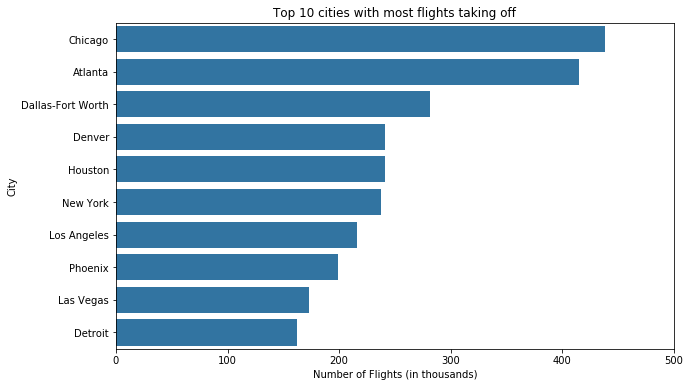

In [830]:
plt.figure(figsize = (10, 6))
sb.barplot(y = top10_cities.index, x = top10_cities.values, color = base_color)
plt.title("Top 10 cities with most flights taking off")
plt.xlabel("Number of Flights (in thousands)")
plt.ylabel("City")
ticks10 = np.array([n for n in range(0, 600, 100)])
plt.xticks(ticks10*1000, ticks10);

#### `Origin_state` 

**What are the top 3 states with the most flights scheduled to take off? What are the top 3 states with the least flights scheduled to take off?**

In [428]:
origin_states_top3 = f2008_clean.Origin_state.value_counts()[0:3]
origin_states_bot3 = f2008_clean.Origin_state.value_counts()[-3:]

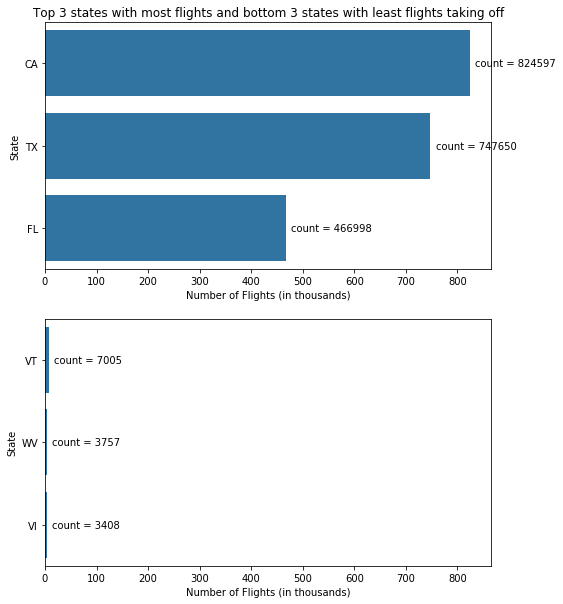

In [829]:
# Plotting two figures one on top of another
plt.figure(figsize = (8, 10))

ax1 = plt.subplot(211)
sb.barplot(y = origin_states_top3.index, x = origin_states_top3.values, color = base_color)
plt.title("Top 3 states with most flights and bottom 3 states with least flights taking off")
plt.xlabel("Number of Flights (in thousands)")
plt.ylabel("State")
ticks11 = np.array([n for n in range(0, 900, 100)])
plt.xticks(ticks11*1000, ticks11);

# Add count to each bar
for i in range(origin_states_top3.shape[0]):
    count = origin_states_top3[i]
    plt.text(count + 10000, i, "count = " + str(count), va = "center")

ax2 = plt.subplot(212, sharex = ax1)
sb.barplot(y = origin_states_bot3.index, x = origin_states_bot3.values, color = base_color)
plt.xlabel("Number of Flights (in thousands)")
plt.ylabel("State")
plt.xticks(ticks11*1000, ticks11);

for i in range(origin_states_bot3.shape[0]):
    count = origin_states_bot3[i]
    plt.text(count + 10000, i, "count = " + str(count), va = "center")

As shown above, California, Texas, and Florida are the top three states (in descending order) with the most flights scheduled. On the other end of the spectrum, Vermont, West Virginia, and United States Virgin Islands have the least number of flights (in descending order). 

### Investigation and Analysis of Univariate Exporation.

Of the features you investigated, some of the data needed to be tidied, adjusted, or changed.

- AirTime NaN values are due to diverted and cancelled flights.
- AirTime and Distance contain outliers. These are all the flights to and from Honolulu, Hawaii.
- CancellationReason changed from Code to written reason

<font color='red'> TO ADD </font>

<a id="bi"></a>
## Bivariate Exploration

In bivariate exploration, the relationships between two variables are explored. Firstly, a **correlation matrix** will be plotted to provide an overview and potential interesting correlation between each pair of quantitative variables. 

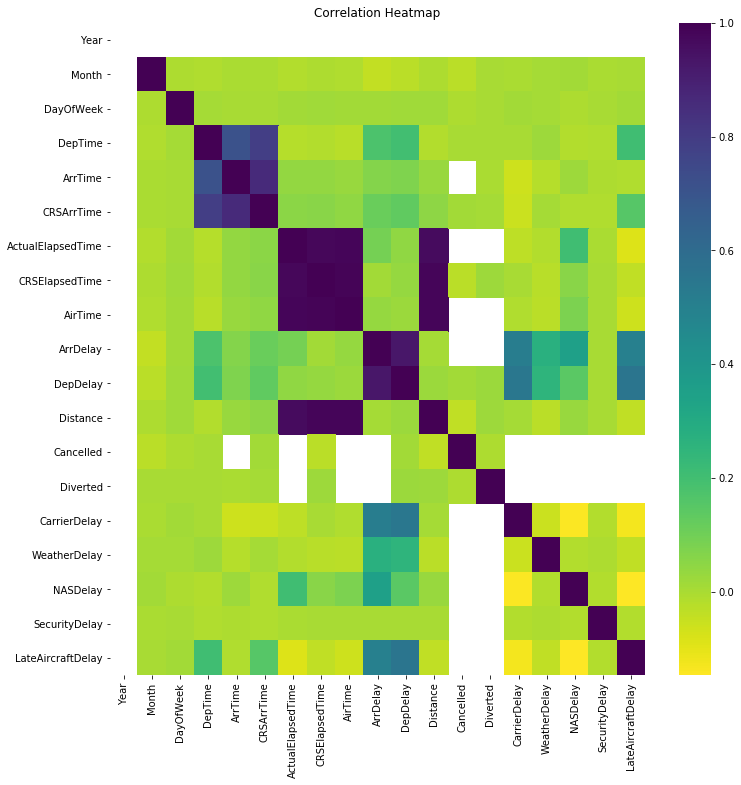

In [763]:
plt.figure(figsize = (12, 12))
sb.heatmap(f2008_clean.corr(), cmap = "viridis_r")
plt.title("Correlation Heatmap");

From the correlation heatmap, there appears to several groups of variables which have strong positive correlation with one another. These are:
- `DepTime`, `ArrTime`, and `CRSArrTime` (Pearson correlation coefficient r > 0.6)
- `ActualElapsedTime`, `CRSElapsedTime`, and `AirTime` (r close to 1)
- `DepDelay` and `ArrDelay` (r > 0.8)

In addition, `Distance` appears to be strongly correlated with `ActualElapsedTime`, `CRSElapsedTime`, and `AirTime` as we would expect. 

Furthemore, most type of delays (apart from `SecurityDelay`) appear to have a weak postive correlation with `ArrDelay` and `DepDelay`. 

Now, the following bivariate relationships will be explored in this section.

1. `Month` and `Cancelled` - are there particular months where more flights are cancelled?
2. `Month` and `CancellationReason` - are there particular months where more flights are cancelled for a particular reason?
3. `DayOfWeek` and `Airline` - do some airlines operate flights more often on particular days of the week?
4. `ActualElapsedTime` and `CRSElapsedTime` - what is the distribution of the differences between actual elapsed time and scheduled elapsed time of flight? 
5. `AirTime` and `Distance` - how closely do time in the air and distance travelled correlate?
6. `Distance` and `Airline` - do certain airlines favour short-haul or long-haul flights?
7. `Airline` and `CarrierDelay` - are there certain airlines where more delays occur due to carrier delay?
8. `Airline` and `LateAircraftDelay` - are there certain airlines where more delays occur due to late aircraft arrival?
9. `Origin_city` and `WeatherDelay` -  are there certain departure cities where more delays occur due to the weather?

#### `Month` and `Cancelled` 

**Are there particular months where more flights are cancelled?**

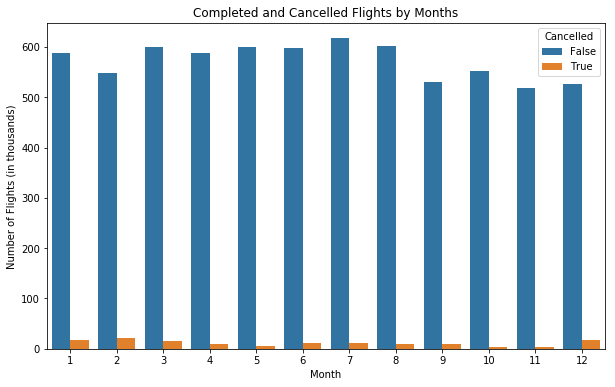

In [828]:
# Month and Cancelled are both qualitative variables so a clustered bar chart is appropriate
plt.figure(figsize = (10, 6))
sb.countplot(data = f2008_clean, x = "Month", hue = "Cancelled")
plt.title("Completed and Cancelled Flights by Months")
plt.ylabel("Number of Flights (in thousands)")
ticks12 = np.array([n for n in range(0, 700, 100)])
plt.yticks(ticks12*1000, ticks12);

The plot above does not give a good indication whether there is a relationship between month and cancelled flights. Rather than looking at the absolute number of completed and cancelled flights, the proportions of cancelled flights may be better.

In [516]:
cancelled_month = f2008_clean.groupby("Month").Cancelled.sum()
total_month = f2008_clean.groupby("Month").Cancelled.count()
cancelled_prop = cancelled_month/total_month
cancelled_prop

Month
1     0.028572
2     0.036182
3     0.026267
4     0.017312
5     0.010274
6     0.017959
7     0.016878
8     0.016063
9     0.018327
10    0.005841
11    0.008519
12    0.032625
Name: Cancelled, dtype: float64

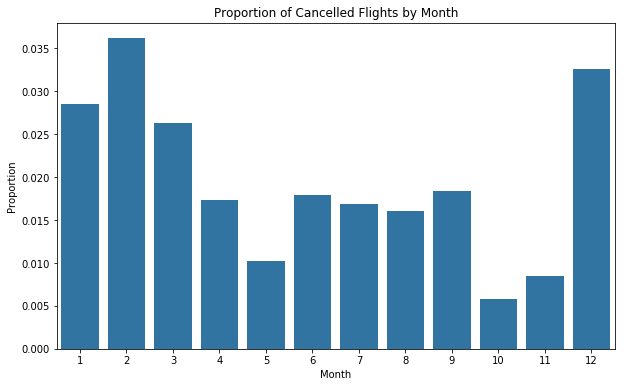

In [822]:
plt.figure(figsize = (10, 6))
sb.barplot(cancelled_prop.index, cancelled_prop.values, color = base_color)
plt.title("Proportion of Cancelled Flights by Month")
plt.ylabel("Proportion");

Above shows the proportion of flights cancelled in 2008 is highest in February, December and January (in that order), and lowest in October and November (in ascending order). Perhaps looking at `CancellationReason` by `Month` could provide further insights.

#### `Month` and `CancellationReason` 

Are there particular months where more flights are cancelled for a particular reason?

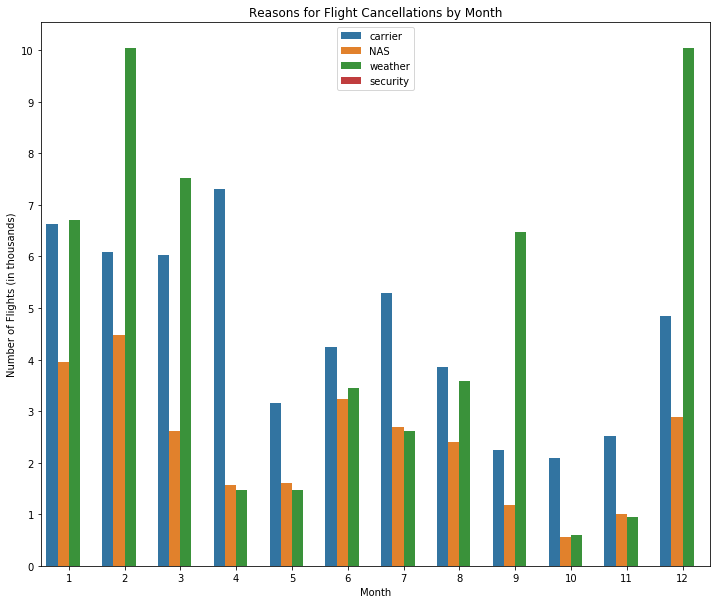

In [827]:
plt.figure(figsize = (12, 10))
sb.countplot(data = f2008_clean, x = "Month", hue = "CancellationReason")
plt.title("Reasons for Flight Cancellations by Month")
plt.ylabel("Number of Flights (in thousands)")
plt.legend(loc = 9)
ticks13 = np.array([n for n in range(0, 11)])
plt.yticks(ticks13*1000, ticks13);

Interestingly, for February and December (the two months with highest number of cancellations) the main reason for cancellations are due to bad weather. January (the third highest number of cancellations) has a fairly similar number of cancellations due to weather and carrier, with both numbers still high. There are very very few cancellations due to security reasons. 

#### `DayOfWeek` and `Airline` <font color="red"> TO DO </font>

Do some airlines operate flights more often on particular days of the week?

In [734]:
airline_dayofweek = f2008_clean.groupby(["Airline", "DayOfWeek"]).count()
airline_dayofweek

Year   Month  DepTime  CRSDepTime  \
Airline                      DayOfWeek                                        
AirTran Airways Corporation  1           37593   37593    37336       37593   
                             2           37200   37200    36908       37200   
                             3           37125   37125    36788       37125   
                             4           37458   37458    37221       37458   
                             5           37867   37867    37424       37867   
                             6           36900   36900    36557       36900   
                             7           37541   37541    37224       37541   
Alaska Airlines Inc.         1           21959   21959    21615       21959   
                             2           22098   22098    21847       22098   
                             3           22232   22232    21969       22232   
                             4           21758   21758    21574       21758   
                             5           21847   21847    21573       21847   
                             6           20148   20148    19829       20148   
                             7           21060   21060    20577       21060   
Aloha Airlines Inc.          1            1050    1050     1036        1050   
                             2            1178    1178     1176        1178   
                             3            1177    1177     1174        1177   
                             4            1182    1182     1175        1182   
                             5            1182    1182     1175        1182   
                             6            1047    1047     1040        1047   
                             7             984     984      982         984   
American Airlines Inc.       1           87770   87770    85761       87770   
                             2           89191   89191    85705       89191   
                             3           89093   89093    85905       89093   
                             4           87511   87511    84466       87511   
                             5           87598   87598    84932       87598   
                             6           78327   78327    76839       78327   
                             7           85395   85395    83925       85395   
American Eagle Airlines Inc. 1           72304   72304    69304       72304   
                             2           73828   73828    70020       73828   
...                                        ...     ...      ...         ...   
Pinnacle Airlines Inc.       6           33256   33256    32519       33256   
                             7           36028   36028    35078       36028   
Skywest Airlines Inc.        1           84300   84300    82118       84300   
                             2           82767   82767    80748       82767   
                             3           83437   83437    82034       83437   
                             4           83844   83844    82304       83844   
                             5           83883   83883    81503       83883   
                             6           69796   69796    68844       69796   
                             7           79132   79132    77351       79132   
Southwest Airlines Co.       1          178680  178680   176578      178680   
                             2          182443  182443   179676      182443   
                             3          181270  181270   178558      181270   
                             4          177630  177630   176020      177630   
                             5          178079  178079   176670      178079   
                             6          140169  140169   139241      140169   
                             7          163483  163483   162653      163483   
US Airways Inc.              1           67346   67346    66311       67346   
                             2           67508   67508    66510       67508   
             

In [752]:
airline_dayofweek.loc['AirTran Airways Corporation', 1][0]

37593

('AirTran Airways Corporation', 1) 1
('AirTran Airways Corporation', 2) 2
('AirTran Airways Corporation', 3) 3
('AirTran Airways Corporation', 4) 4
('AirTran Airways Corporation', 5) 5
('AirTran Airways Corporation', 6) 6
('AirTran Airways Corporation', 7) 7
('Alaska Airlines Inc.', 1) 8
('Alaska Airlines Inc.', 2) 9
('Alaska Airlines Inc.', 3) 10
('Alaska Airlines Inc.', 4) 11
('Alaska Airlines Inc.', 5) 12
('Alaska Airlines Inc.', 6) 13
('Alaska Airlines Inc.', 7) 14
('Aloha Airlines Inc.', 1) 15
('Aloha Airlines Inc.', 2) 16
('Aloha Airlines Inc.', 3) 17
('Aloha Airlines Inc.', 4) 18
('Aloha Airlines Inc.', 5) 19
('Aloha Airlines Inc.', 6) 20
('Aloha Airlines Inc.', 7) 21
('American Airlines Inc.', 1) 22
('American Airlines Inc.', 2) 23
('American Airlines Inc.', 3) 24
('American Airlines Inc.', 4) 25
('American Airlines Inc.', 5) 26
('American Airlines Inc.', 6) 27
('American Airlines Inc.', 7) 28
('American Eagle Airlines Inc.', 1) 29
('American Eagle Airlines Inc.', 2) 30
('Ameri

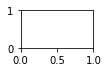

In [758]:
fig = plt.figure()
ax5 = plt.subplot(5, 4, 1)

for airline, num in zip(airline_dayofweek.index, range(1, 141)):
    print(airline, num)

#### `ActualElapsedTime` and `CRSElapsedTime` 

**What is the distribution of the differences between actual elapsed time and scheduled elapsed time of flight?**

To address this question, it is easiest to find the difference between the actual and scheduled elapsed time and plot the distribution of this difference.

In [627]:
elapsed_time = f2008_clean[["ActualElapsedTime", "CRSElapsedTime"]]
elapsed_time["DiffElapsedTime"] = elapsed_time["ActualElapsedTime"] - elapsed_time["CRSElapsedTime"]
elapsed_time = elapsed_time[elapsed_time.DiffElapsedTime.notnull()]
elapsed_time.head()

/Users/ducvu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ActualElapsedTime,CRSElapsedTime,DiffElapsedTime
0,128.0,150.0,-22.0
1,128.0,145.0,-17.0
2,96.0,90.0,6.0
3,88.0,90.0,-2.0
4,90.0,90.0,0.0


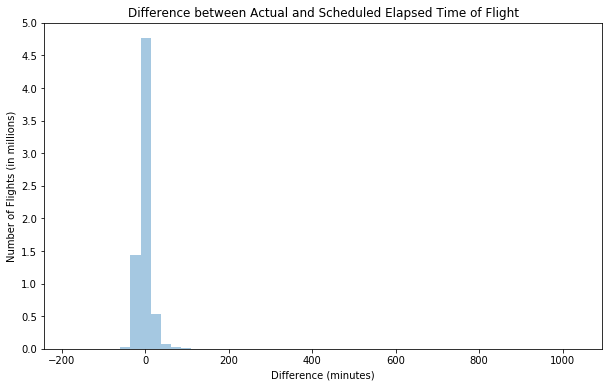

In [844]:
plt.figure(figsize = (10, 6))
sb.distplot(elapsed_time.DiffElapsedTime, kde = False)
plt.title("Difference between Actual and Scheduled Elapsed Time of Flight")
plt.xlabel("Difference (minutes)")
plt.ylabel("Number of Flights (in millions)")
ticks15 = np.array([n/2 for n in range(0, 11)])
plt.yticks(ticks15*1e6, ticks15);

In [644]:
elapsed_time.describe()

,ActualElapsedTime,CRSElapsedTime,DiffElapsedTime
count,6.855029e+06,6.855029e+06,6.855029e+06
mean,1.273224e+02,1.290778e+02,-1.755390e+00
std,7.018731e+01,6.953271e+01,1.403087e+01
min,1.200000e+01,-1.410000e+02,-1.810000e+02
25%,7.700000e+01,8.000000e+01,-9.000000e+00
50%,1.100000e+02,1.110000e+02,-3.000000e+00
75%,1.570000e+02,1.590000e+02,4.000000e+00
max,1.379000e+03,6.600000e+02,1.034000e+03


Again, there appears to be many outliers. There are flights where the actual elapsed time is much lower than the scheduled elapsed time, and vice versa.

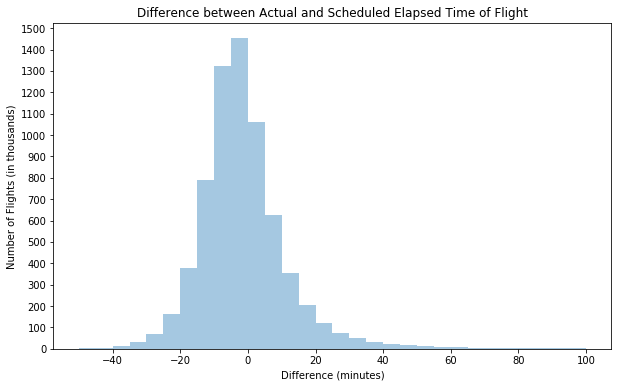

In [847]:
# Note the bin sizes have changed so the peak value has changed
bin_edges4 = [i for i in range(-50, 101, 5)]

plt.figure(figsize = (10, 6))
sb.distplot(elapsed_time.DiffElapsedTime, bins = bin_edges4, kde = False)
plt.title("Difference between Actual and Scheduled Elapsed Time of Flight")
plt.xlabel("Difference (minutes)")
plt.ylabel("Number of Flights (in thousands)")

ticks16 = np.array([n for n in range(0, 1600, 100)])
plt.yticks(ticks16*1000, ticks16);

By removing the outliers in the plot, the distribution looks very close to a normal distriubtion, centred at around zero. This suggest that the actual and scheduled time set by the airline is fairly accurate with the vast majority accurate to $\pm$ 20 minutes. 

#### `AirTime` and `Distance` 

**How closely do time in the air and distance travelled correlate?**

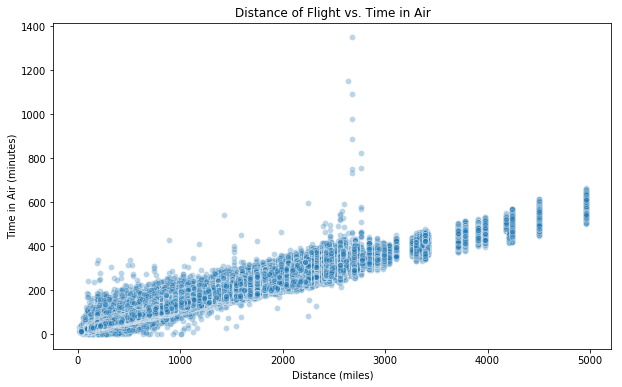

In [848]:
plt.figure(figsize = (10, 6))
sb.scatterplot(data = f2008_clean, x = "Distance", y = "AirTime", alpha = 0.3)
plt.title("Distance of Flight vs. Time in Air")
plt.xlabel("Distance (miles)")
plt.ylabel("Time in Air (minutes)");

There appears to be a thick positive upward sloping line that suggest what is expected - the further the distance between the origin and destination, the greater the time in air. However, there are quite a few flights which do not lie in this thick band. In particular, the points at a distance 2700-2800 miles which form an almost vertical line suggest that the time in flight varies hugely. This may be explored further in the multivariate exploration. 

#### `Distance` and `Airline` 

**Do certain airlines favour short-haul or long-haul flights?**

To address this question, the distribution of distance of flights made by each airline will be created. 

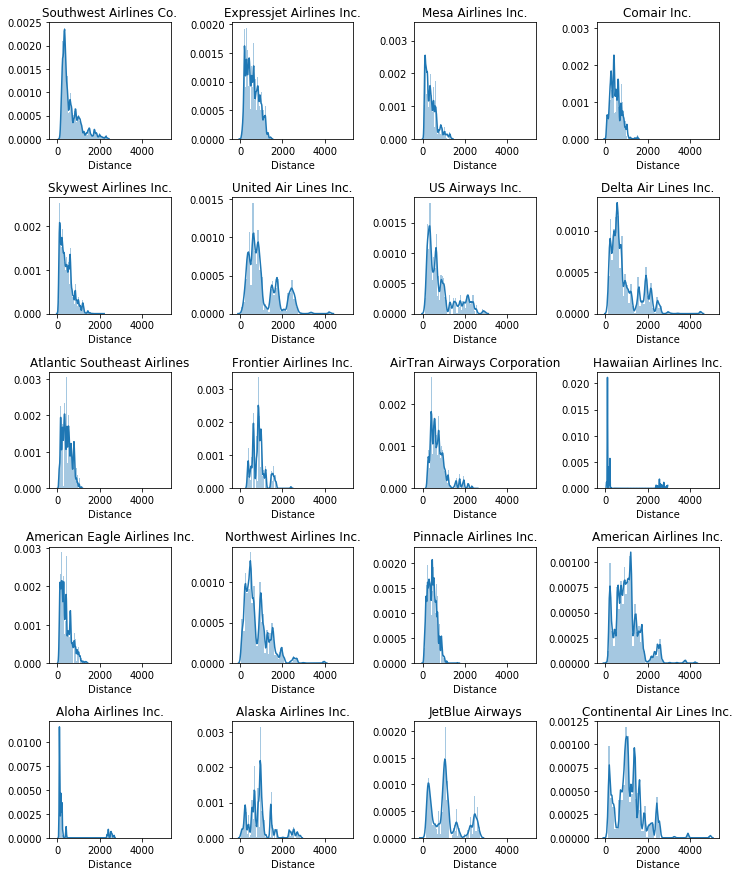

In [668]:
airlines = f2008_clean.Airline.unique()
location = [i for i in range(1, 21)]

fig = plt.figure(figsize = (12, 15))

# Share axes with plot with highest values on axis
ax3 = plt.subplot(5, 4, 20)

# Create space between plots
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)

for airline, loc in zip(airlines, location):
    ax = plt.subplot(5, 4, loc, sharex = ax3)
    airline_plot = f2008_clean[f2008_clean.Airline == airline]
    sb.distplot(airline_plot.Distance)
    plt.title(airline)
    plt.xlabel("Distance (miles)");

There are some really interesting insights provided by these plots. Three are described below.
- Many airlines operate flights that are under 2000 miles, including Southwest Airlines Co., Expressjet Airlines Inc., Mesa Airlines Inc., Comair Inc., Skywest Airlines Inc., Atlantic Southeast Airlines, American Eagle Airlines Inc., and Pinnacle Airlines Inc.
- Both Hawaiian Airlines Inc. and Aloha Airlines Inc. have a pronounced bimodial peaks. The peaks at short distances correspond to flights between Hawaiian cities (e.g. Honolulu, Kahului, Lihue), and the peaks at distances above 2000 miles are flights to Californian cities (e.g. Santa Ana, Oakland, Sacramento). 
- Several airlines operate many different routes at different distances shown by the multimodal peaks, such as United Air Lines Inc., Delta Air Lines Inc., American Airlines Inc., Alaska Airlines Inc., JetBlue Airways, and Continental Air Lines Inc. 

In [671]:
hawaii = f2008_clean[f2008_clean.Airline == "Aloha Airlines Inc."]
hawaii["Origin_city"].value_counts()

Honolulu       3215
Kahului        1348
Lihue          1000
Kailua/Kona     891
Hilo            532
Santa Ana       303
Oakland         184
Sacramento      118
San Diego        89
Las Vegas        60
Reno             60
Name: Origin_city, dtype: int64

#### `Airline` and `CarrierDelay` 

**Are there certain airlines where more delays occur due to carrier delay?**

First, the total delay time due to carrier delay will be computed for each airline. 

In [683]:
# Groups by Airline and compute the total time delayed due to carrier delay
airline_carrier_delays = f2008_clean.groupby("Airline").CarrierDelay.sum()
airline_carrier_delays_order = airline_carrier_delays.sort_values(ascending = False)
airline_carrier_delays_order

Airline
American Airlines Inc.          2821907.0
Southwest Airlines Co.          2261002.0
Mesa Airlines Inc.              1927740.0
United Air Lines Inc.           1720150.0
American Eagle Airlines Inc.    1705271.0
Atlantic Southeast Airlines     1688969.0
Skywest Airlines Inc.           1678216.0
Northwest Airlines Inc.         1478247.0
Delta Air Lines Inc.            1411220.0
Expressjet Airlines Inc.        1218009.0
US Airways Inc.                 1109335.0
Comair Inc.                     1075766.0
Continental Air Lines Inc.       996161.0
Pinnacle Airlines Inc.           908509.0
JetBlue Airways                  677621.0
Alaska Airlines Inc.             481833.0
AirTran Airways Corporation      443708.0
Frontier Airlines Inc.           250971.0
Hawaiian Airlines Inc.           184855.0
Aloha Airlines Inc.                8727.0
Name: CarrierDelay, dtype: float64

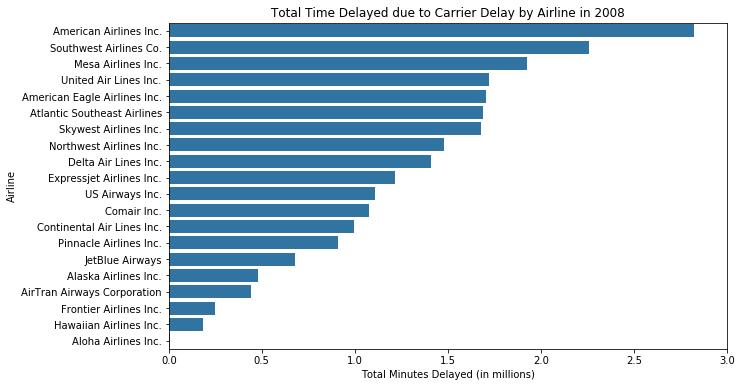

In [852]:
plt.figure(figsize = (10, 6))
sb.barplot(y = airline_carrier_delays_order.index, x = airline_carrier_delays_order.values,
          color = base_color)
plt.title("Total Time Delayed due to Carrier Delay by Airline in 2008")
plt.xlabel("Total Minutes Delayed (in millions)")
ticks17 = np.array([n/2 for n in range(0, 7)])
plt.xticks(ticks17*1e6, ticks17);

Perhaps a more fair comparison is computing the average number of minutes delayed per flight.

In [697]:
# Compute the average number of minutes delayed
airline_count = f2008_clean.groupby("Airline").count()["Year"]
carrier_delay_prop = (airline_carrier_delays/airline_count).sort_values(ascending = False)
carrier_delay_prop

Airline
Mesa Airlines Inc.              7.561841
Atlantic Southeast Airlines     6.019670
Comair Inc.                     5.443967
American Airlines Inc.          4.665196
Northwest Airlines Inc.         4.252088
United Air Lines Inc.           3.826680
American Eagle Airlines Inc.    3.475230
Pinnacle Airlines Inc.          3.464841
JetBlue Airways                 3.455646
Continental Air Lines Inc.      3.337726
Expressjet Airlines Inc.        3.252274
Alaska Airlines Inc.            3.188793
Delta Air Lines Inc.            3.122645
Hawaiian Airlines Inc.          2.989923
Skywest Airlines Inc.           2.958987
Frontier Airlines Inc.          2.620779
US Airways Inc.                 2.445683
Southwest Airlines Co.          1.881418
AirTran Airways Corporation     1.695587
Aloha Airlines Inc.             1.118846
dtype: float64

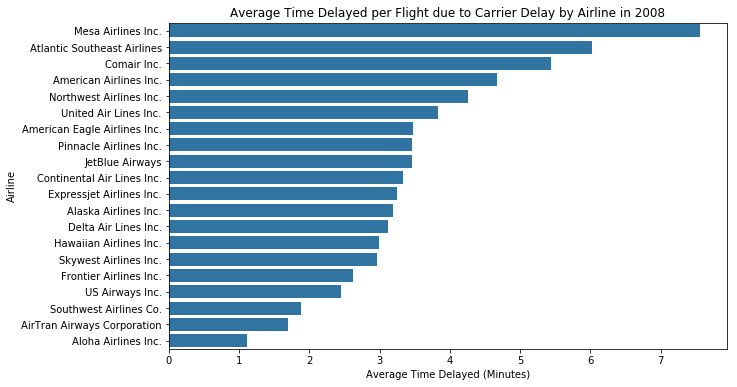

In [853]:
plt.figure(figsize = (10, 6))
sb.barplot(y = carrier_delay_prop.index, x = carrier_delay_prop.values,
          color = base_color)
plt.title("Average Time Delayed per Flight due to Carrier Delay by Airline in 2008")
plt.xlabel("Average Time Delayed (Minutes)");

From this barchart, it can be shown that Mesa Airlines Inc. has the highest average time delayed per flight due to carrier delay and Aloha Airlines Inc. has the lowest average time.

#### `Airline` and `LateAircraftDelay` 

**Are there certain airlines where more delays occur due to late aircraft arrival?**

As an extension to the previous analysis on `CarrierDelay`, this takes a look at late aircraft delay. 

In [701]:
# Calculates the average time delayed due to late aircraft arrival
late_delay = f2008_clean.groupby("Airline").LateAircraftDelay.sum()
airline_count = f2008_clean.groupby("Airline").count()["Year"]
late_delay_prop = (late_delay/airline_count).sort_values(ascending = False)

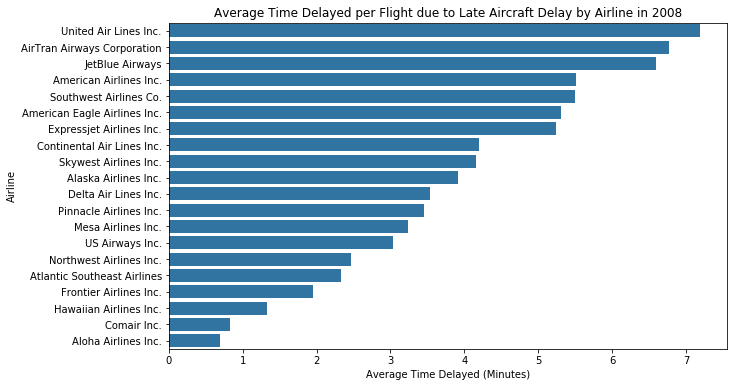

In [854]:
plt.figure(figsize = (10, 6))
sb.barplot(y = late_delay_prop.index, x = late_delay_prop.values, color = base_color)
plt.title("Average Time Delayed per Flight due to Late Aircraft Delay by Airline in 2008")
plt.xlabel("Average Time Delayed (Minutes)");

For Late Aircraft Delay, United Air Lines  Inc. has the highest average time delayed per flight. Aloha Airlines Inc., again, has the lowest average time.

#### `Origin_city` and `WeatherDelay` 

Are there certain departure cities where more delays occur due to the weather?

In [705]:
# Groupby city and find the total number of flights delayed due to weather and the total time of delay
weather_delay_origin_count = f2008_clean.groupby("Origin_city").WeatherDelay.count().sort_values(ascending = False)
weather_delay_origin_total = f2008_clean.groupby("Origin_city").WeatherDelay.sum().sort_values(ascending = False)

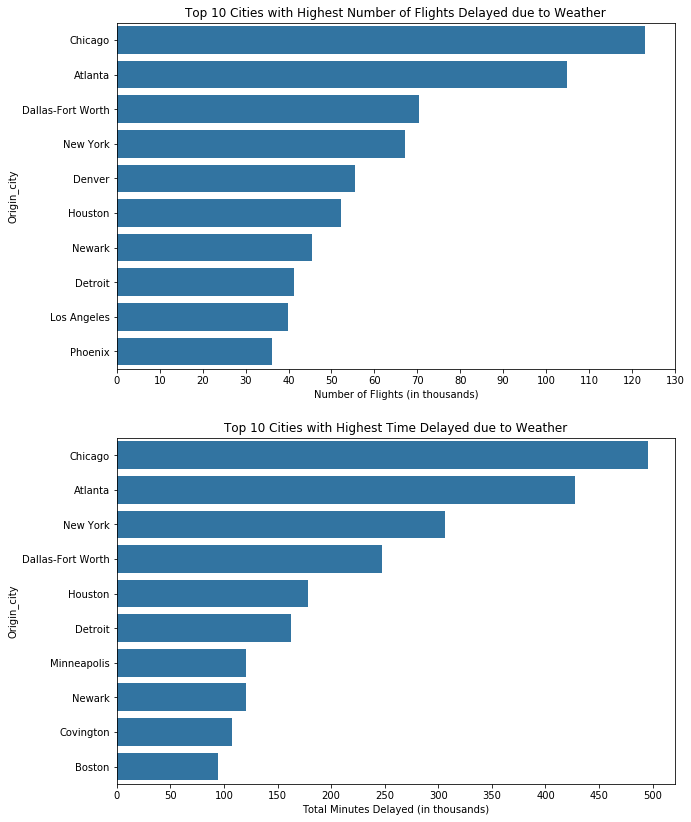

In [858]:
plt.figure(figsize = (10, 14))

plt.subplot(2, 1, 1)
sb.barplot(y = weather_delay_origin_count.index[0:10], x = weather_delay_origin_count.values[0:10], 
           color = base_color)
plt.title("Top 10 Cities with Highest Number of Flights Delayed due to Weather")
plt.xlabel("Number of Flights (in thousands)")
ticks18 = np.array([n for n in range(0, 140, 10)])
plt.xticks(ticks18*1000, ticks18);

plt.subplot(2, 1, 2)
sb.barplot(y = weather_delay_origin_total.index[0:10], x = weather_delay_origin_total.values[0:10], 
           color = base_color)
plt.title("Top 10 Cities with Highest Time Delayed due to Weather")
plt.xlabel("Total Minutes Delayed (in thousands)")
ticks19 = np.array([n for n in range(0, 501, 50)])
plt.xticks(ticks19*1000, ticks19);

Chicago, Atlanta, Dallas-Fort Worth, New York, Housten, Newark, and Detroit is in the top 10 cities with have the highest number of flights delayed and total cumulative time delayed in 2008.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset? <font color = "red"> TO DO </font>

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

<a id="multi"></a>
## Multivariate Exploration

In multivariate exploration, plots of three or more variables are investigated and analysed. In this section the 2008 flights are explored.

- `AirTime`, `Diverted` and `CRSElapsedTime`
- `AirTime` and `Distance` and `Diverted`
- `Origin_city` and `Dest_city` - Are there certain routes that are particularly popular for flights?


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!